# Theoratical Part

In first we discuss simple binary class classification which simply means yes or no but know we will dive into multiclass classification:

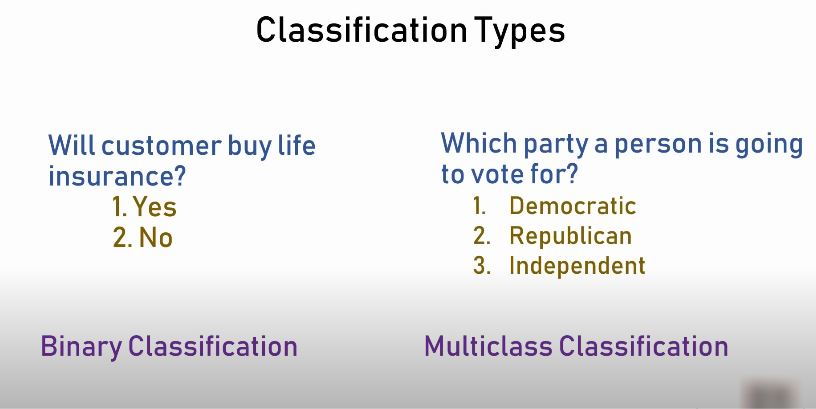

For example when you try to predict which party is going to vote for the possible outcomes are one of these three.

The concrete problem we are going to solve today is to recognize the hand written digit for example here:

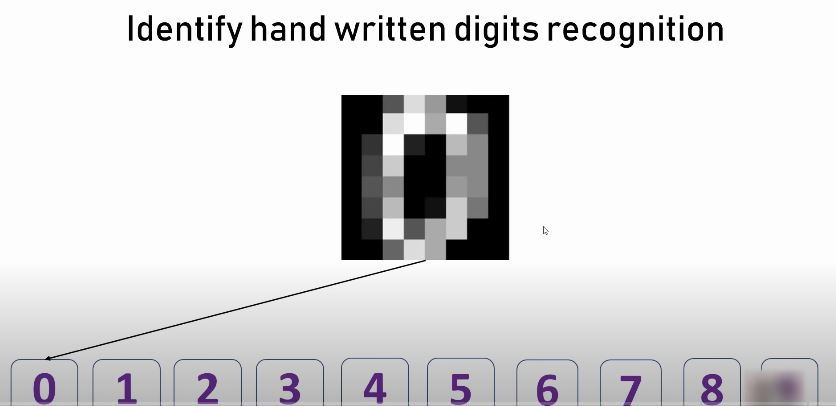

This one maps to one of the output categories which is nothing but digits 0-9 similary here:

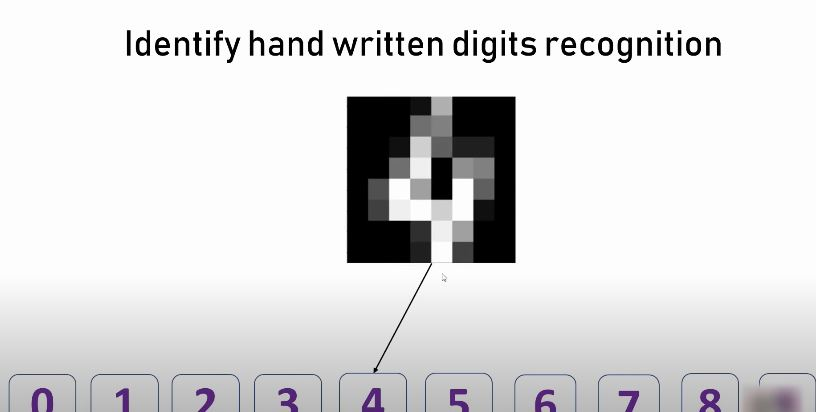

it is mapping towards 4. So we will use a training set with lot of hand digit characters and then we'll build a model using logistic regression

# Coding part

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [29]:
digits = load_digits()

In [30]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [31]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

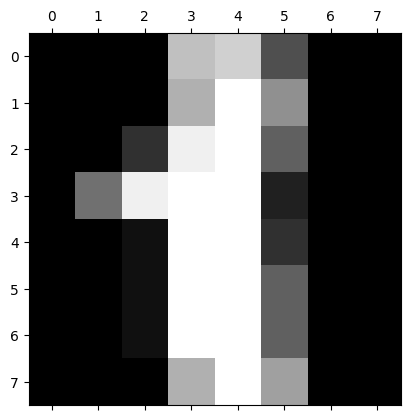

In [32]:
plt.gray()
plt.matshow(digits.images[1])

<Figure size 640x480 with 0 Axes>

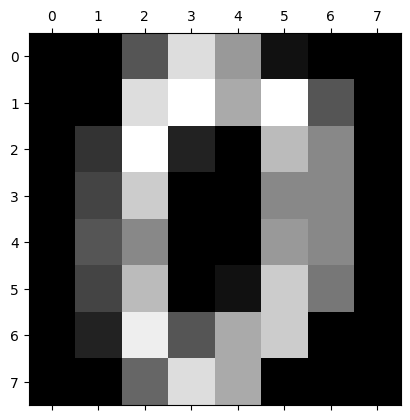

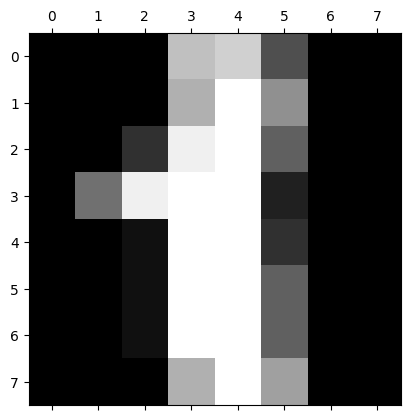

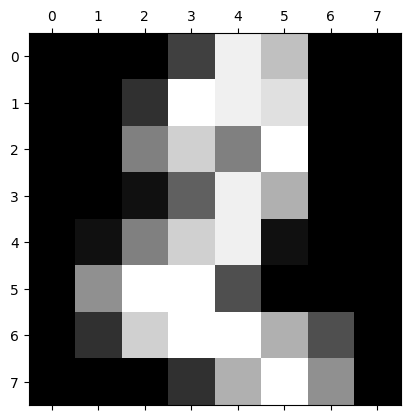

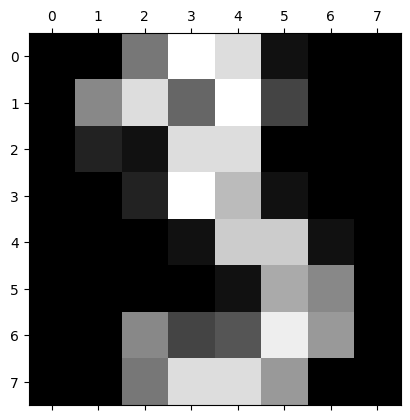

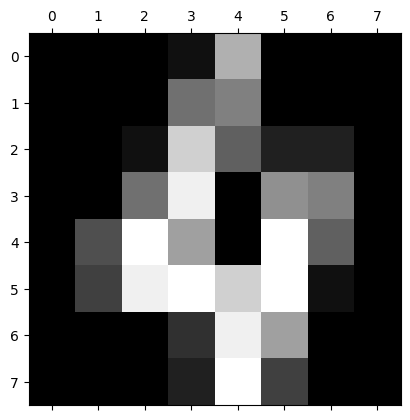

In [33]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [34]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [36]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [55]:
len(X_train)

1437

In [56]:
len(X_test)

360

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression(max_iter=1000)

In [59]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
model.score(X_train,y_train)

1.0

In [62]:
model.score(X_test,y_test)

0.9555555555555556

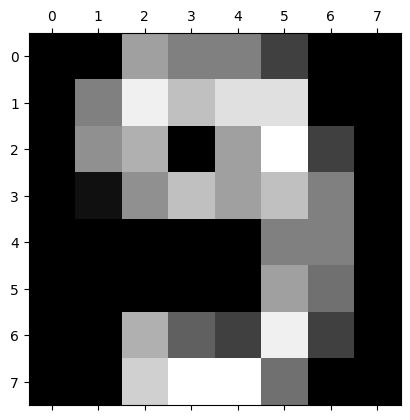

In [67]:
plt.matshow(digits.images[1534])

In [68]:
digits.target[1534]

np.int64(9)

In [69]:
model.predict([digits.data[1534]])

array([9])

In [70]:
model.predict([digits.data[923]])

array([8])

In [71]:
digits.target[923]

np.int64(8)

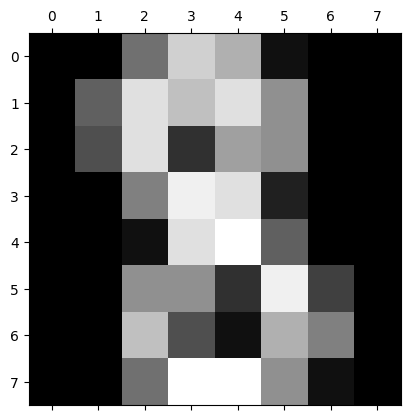

In [72]:
plt.matshow(digits.images[923])

In [74]:
model.predict(digits.data[0:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [75]:
# Confusion matrix to check the accuracy of the model

In [76]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  0,  0,  2,  1,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

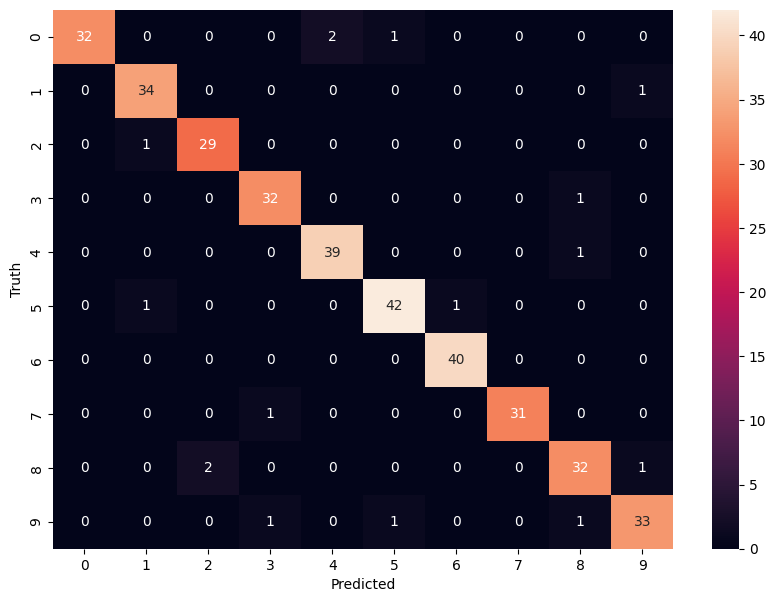

In [77]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

it is the visualization of confusion matrix, here the number 37 means is that 37 times the truth was 0 and my model predicted it to be 0 and in the 3rd row the 2 means that 2 times my truth was 8 meaning i fed my model the image of 8 but my model say that no it is 1 so these are the instances where it is not doing good